# Exoplanet exploration using Machine Learning

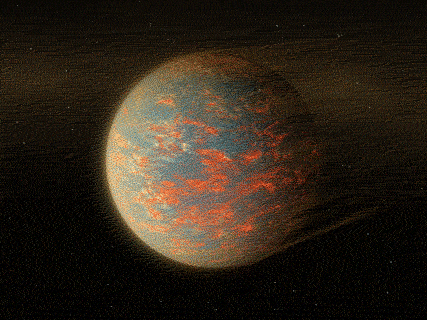

## What are exoplanets?

Exoplanets are planets beyond our own solar system. Thousands have been discovered in the past two decades, mostly with NASA’s Kepler Space Telescope.

These exoplanets come in a huge variety of sizes and orbits. Some are gigantic planets hugging close to their parent stars; others are icy, some rocky. NASA and other agencies are looking for a special kind of planet: one that’s the same size as Earth, orbiting a sun-like star in the habitable zone.


The habitable zone is the area around a star where it is not too hot and not too cold for liquid water to exist on the surface of surrounding planets. Imagine if Earth was where Pluto is. The Sun would be barely visible (about the size of a pea) and Earth’s ocean and much of its atmosphere would freeze.

You can also check out my article to understand more about exoplanets at [www.theaidream.com](https://www.theaidream.com/post/exoplanet-exploration-using-machine-learning)

In [54]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Imports

In [55]:
import warnings
import math
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import (recall_score, precision_score, classification_report, accuracy_score, 
                             confusion_matrix, roc_curve, auc, roc_curve, accuracy_score, plot_confusion_matrix)
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.ensemble import BalancedRandomForestClassifier

from collections import Counter

### Load the train and test data.

In [56]:
test_data = pd.read_csv('../exoplanet_exploration_data/exoTest.csv')
train_data = pd.read_csv('../exoplanet_exploration_data/exoTrain.csv')

In [57]:
train_data

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0      -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1      -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2      486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3      311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4    -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   
...       ...     ...  ...        ...        ...        ...        ...   
5082   -49.25  -30.92  ...     139.95     147.26     156.95     155.64   
5083   458.87  492.84  ...     -26.50      -4.84     -76.30     -37.84   
5084   254.88  237.60  ...     -26.82     -53.89     -48.71      30.99   
5085    -0.03    3.28  ...      10.86      -3.23      -5.10      -4.61   
5086   178.93  118.93  ...      71.19       0.97      55.20      -1.63   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0         48.57      92.54      39.32      61.42       5.08     -39.54  
1         -4.86       0.76     -11.70       6.46      16.00      19.93  
2        -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3         20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4       -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  
...         ...        ...        ...        ...        ...        ...  
5082     156.36     151.75     -24.45     -17.00       3.23      19.28  
5083    -153.83    -136.16      38.03     100.28     -45.64      35.58  
5084      15.96      -3.47      65.73      88.42      79.07      79.43  
5085      -9.82      -1.50      -4.65     -14.55      -6.41      -2.55  
5086      -5.50     -25.33     -41.31     -16.72     -14.09      27.82  

[5087 rows x 3198 columns]

In [58]:
test_data

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0        2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1        2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2        2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3        2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4        2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   
..     ...      ...      ...      ...      ...      ...      ...      ...   
565      1   374.46   326.06   319.87   338.23   251.54   209.84   186.35   
566      1    -0.36     4.96     6.25     4.20     8.26    -9.53   -10.10   
567      1   -54.01   -44.13   -41.23   -42.82   -39.47   -24.88   -31.14   
568      1    91.36    85.60    48.81    48.69    70.05    22.30    11.63   
569      1  3071.19  2782.53  2608.69  2325.47  2089.37  1769.56  1421.09   

      FLUX.8   FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0       6.98     6.63  ...      14.52      19.29      14.44      -1.62   
1    5569.47  5550.44  ...    -581.91    -984.09   -1230.89   -1600.45   
2     362.95   207.27  ...      17.82     -51.66     -48.29     -59.99   
3    -746.50  -709.53  ...     122.34      93.03      93.03      68.81   
4     -45.20    -5.04  ...     -37.87     -61.85     -27.15     -21.18   
..       ...      ...  ...        ...        ...        ...        ...   
565   167.46   135.45  ...    -123.55    -166.90    -222.44    -209.71   
566    -4.54   -11.55  ...     -12.40      -5.99     -17.94     -11.96   
567   -24.71   -13.12  ...      -0.73      -1.64       1.58      -4.82   
568    37.86    28.27  ...       2.44      11.53     -16.42     -17.86   
569  1142.09   902.31  ...     695.41     865.97     882.41    1203.06   

     FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0        13.33      45.50      31.93      35.78     269.43      57.72  
1     -1824.53   -2061.17   -2265.98   -2366.19   -2294.86   -2034.72  
2       -82.10    -174.54     -95.23    -162.68     -36.79      30.63  
3         9.81      20.75      20.25    -120.81    -257.56    -215.41  
4       -33.76     -85.34     -81.46     -61.98     -69.34     -17.84  
..         ...        ...        ...        ...        ...        ...  
565    -180.16    -166.83    -235.66    -213.63    -205.99    -194.07  
566     -12.11     -13.68      -3.59      -5.32     -10.98     -11.24  
567     -11.93     -17.14      -4.25       5.47      14.46      18.70  
568      21.10     -10.25     -37.06      -8.43      -6.48      17.60  
569    1293.03    1354.41    -192.81    -277.22     -69.63     121.56  

[570 rows x 3198 columns]

In [59]:
full_data = pd.concat([train_data, test_data], axis=0)
full_data

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0        2    93.85    83.81    20.10   -26.98   -39.56  -124.71  -135.18   
1        2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81   -86.55   
2        2   532.64   535.92   513.73   496.92   456.45   466.00   464.50   
3        2   326.52   347.39   302.35   298.13   317.74   312.70   322.33   
4        2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48  -998.34   
..     ...      ...      ...      ...      ...      ...      ...      ...   
565      1   374.46   326.06   319.87   338.23   251.54   209.84   186.35   
566      1    -0.36     4.96     6.25     4.20     8.26    -9.53   -10.10   
567      1   -54.01   -44.13   -41.23   -42.82   -39.47   -24.88   -31.14   
568      1    91.36    85.60    48.81    48.69    70.05    22.30    11.63   
569      1  3071.19  2782.53  2608.69  2325.47  2089.37  1769.56  1421.09   

      FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0     -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1     -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2     486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3     311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4   -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   
..       ...     ...  ...        ...        ...        ...        ...   
565   167.46  135.45  ...    -123.55    -166.90    -222.44    -209.71   
566    -4.54  -11.55  ...     -12.40      -5.99     -17.94     -11.96   
567   -24.71  -13.12  ...      -0.73      -1.64       1.58      -4.82   
568    37.86   28.27  ...       2.44      11.53     -16.42     -17.86   
569  1142.09  902.31  ...     695.41     865.97     882.41    1203.06   

     FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0        48.57      92.54      39.32      61.42       5.08     -39.54  
1        -4.86       0.76     -11.70       6.46      16.00      19.93  
2       -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3        20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4      -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  
..         ...        ...        ...        ...        ...        ...  
565    -180.16    -166.83    -235.66    -213.63    -205.99    -194.07  
566     -12.11     -13.68      -3.59      -5.32     -10.98     -11.24  
567     -11.93     -17.14      -4.25       5.47      14.46      18.70  
568      21.10     -10.25     -37.06      -8.43      -6.48      17.60  
569    1293.03    1354.41    -192.81    -277.22     -69.63     121.56  

[5657 rows x 3198 columns]

Now the target column LABEL consists of two categories 1(Does not represents exoplanet) and 2(represents the presence of exoplanet). So, convert them to binary values for easier processing of data.

In [60]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

In [61]:
train_data.describe()

LABEL        FLUX.1        FLUX.2        FLUX.3        FLUX.4  \
count  5087.000000  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean      0.007273  1.445054e+02  1.285778e+02  1.471348e+02  1.561512e+02   
std       0.084982  2.150669e+04  2.179717e+04  2.191309e+04  2.223366e+04   
min       0.000000 -2.278563e+05 -3.154408e+05 -2.840018e+05 -2.340069e+05   
25%       0.000000 -4.234000e+01 -3.952000e+01 -3.850500e+01 -3.505000e+01   
50%       0.000000 -7.100000e-01 -8.900000e-01 -7.400000e-01 -4.000000e-01   
75%       0.000000  4.825500e+01  4.428500e+01  4.232500e+01  3.976500e+01   
max       1.000000  1.439240e+06  1.453319e+06  1.468429e+06  1.495750e+06   

             FLUX.5        FLUX.6        FLUX.7        FLUX.8        FLUX.9  \
count  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   1.561477e+02  1.469646e+02  1.168380e+02  1.144983e+02  1.228639e+02   
std    2.308448e+04  2.410567e+04  2.414109e+04  2.290691e+04  2.102681e+04   
min   -4.231956e+05 -5.975521e+05 -6.724046e+05 -5.790136e+05 -3.973882e+05   
25%   -3.195500e+01 -3.338000e+01 -2.813000e+01 -2.784000e+01 -2.683500e+01   
50%   -6.100000e-01 -1.030000e+00 -8.700000e-01 -6.600000e-01 -5.600000e-01   
75%    3.975000e+01  3.514000e+01  3.406000e+01  3.170000e+01  3.045500e+01   
max    1.510937e+06  1.508152e+06  1.465743e+06  1.416827e+06  1.342888e+06   

       ...     FLUX.3188     FLUX.3189     FLUX.3190     FLUX.3191  \
count  ...  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   ...  3.485578e+02  4.956476e+02  6.711211e+02  7.468790e+02   
std    ...  2.864786e+04  3.551876e+04  4.349963e+04  4.981375e+04   
min    ... -3.240480e+05 -3.045540e+05 -2.933140e+05 -2.838420e+05   
25%    ... -1.760000e+01 -1.948500e+01 -1.757000e+01 -2.076000e+01   
50%    ...  2.600000e+00  2.680000e+00  3.050000e+00  3.590000e+00   
75%    ...  2.211000e+01  2.235000e+01  2.639500e+01  2.909000e+01   
max    ...  1.779338e+06  2.379227e+06  2.992070e+06  3.434973e+06   

          FLUX.3192     FLUX.3193      FLUX.3194      FLUX.3195  \
count  5.087000e+03  5.087000e+03    5087.000000    5087.000000   
mean   6.937372e+02  6.553031e+02    -494.784966    -544.594264   
std    5.087103e+04  5.339979e+04   17844.469520   17722.339334   
min   -3.288214e+05 -5.028894e+05 -775322.000000 -732006.000000   
25%   -2.226000e+01 -2.440500e+01     -26.760000     -24.065000   
50%    3.230000e+00  3.500000e+00      -0.680000       0.360000   
75%    2.780000e+01  3.085500e+01      18.175000      18.770000   
max    3.481220e+06  3.616292e+06  288607.500000  215972.000000   

           FLUX.3196      FLUX.3197  
count    5087.000000    5087.000000  
mean     -440.239100    -300.536399  
std     16273.406292   14459.795577  
min   -700992.000000 -643170.000000  
25%       -21.135000     -19.820000  
50%         0.900000       1.430000  
75%        19.465000      20.280000  
max    207590.000000  211302.000000  

[8 rows x 3198 columns]

## Exploratory plots

Now visualize the target column in the train_dataset and get an idea about the class distribution.

In [62]:
train_data['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [63]:
test_data['LABEL'].value_counts()

0    565
1      5
Name: LABEL, dtype: int64

We have 5050 records of non-exoplanets and 37 records of exoplanets.

Text(0.5, 1.0, 'Class Distributions \n (0: Not Exoplanet & 1: Exoplanet)')

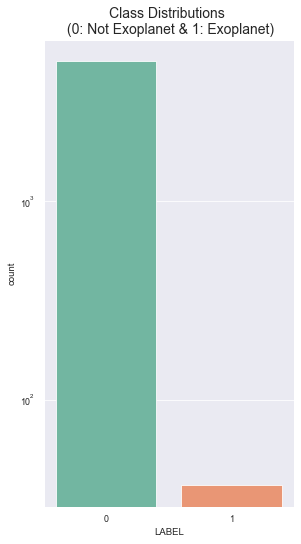

In [64]:
plt.figure(figsize=(4,8))
colors = ["0", "1"]
sns.countplot('LABEL', data=train_data, palette = "Set2")

plt.yscale('log')

plt.title('Class Distributions \n (0: Not Exoplanet & 1: Exoplanet)', fontsize=14)

It turns out that the data is highly imbalanced so later on we'll be using some sampling techniques to balance the data.

### Plotting heatmap of missing values

In [65]:
# sns.heatmap(train_data.isnull())

In [66]:
np.unique(train_data.isnull())

array([False])

We can clearly see that we dont have any missing values in our dataset.

This heatmap is not insightful into the behaviour of the data and it is also computationally expensive to make. I believe just inspecting the `isnull` dataframe and seeing there are no True instances is enough.

**Flux :** the intensity of light recived from a planet

### Let us plot the first 4 rows of the train data and observe the intensity of flux values.

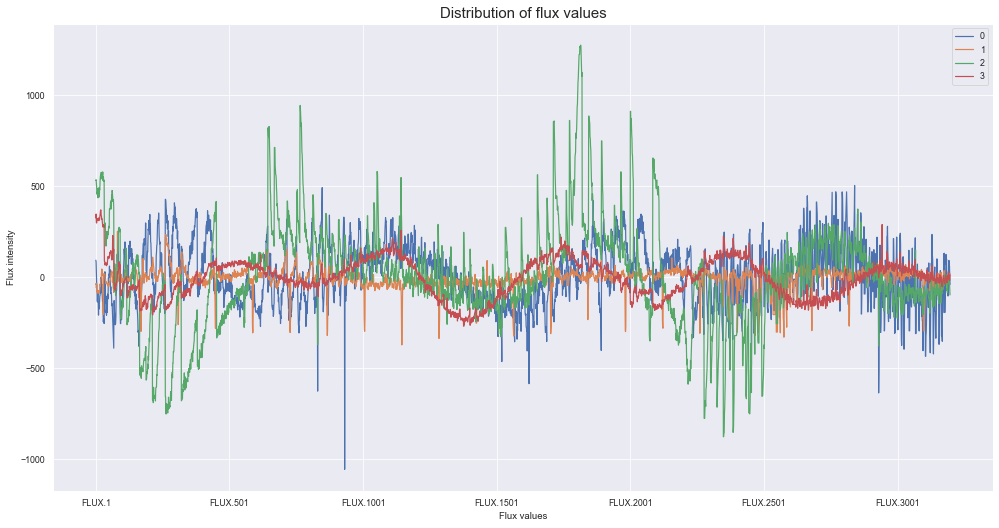

In [67]:
fig, ax = plt.subplots(figsize=(15, 8))

plot_df = train_data[0:4].drop('LABEL', axis=1)
plot_df.T.plot(ax=ax)

plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')

plt.show()

### Flux Distributions per class

In [68]:
train_aver_1 = train_data.loc[train_data['LABEL']==1].mean(axis=0).to_numpy()
train_aver_0 = train_data.loc[train_data['LABEL']==0].mean(axis=0).to_numpy()
test_aver_1 = train_data.loc[train_data['LABEL']==1].mean(axis=0).to_numpy()
test_aver_0 = train_data.loc[train_data['LABEL']==0].mean(axis=0).to_numpy()

In [69]:
arr = np.stack([train_aver_1, train_aver_0, test_aver_1, test_aver_0], axis=0)

columns = train_data.loc[train_data['LABEL']==0].mean(axis=0).index

average = pd.DataFrame(arr, columns=columns)
average

LABEL       FLUX.1       FLUX.2       FLUX.3       FLUX.4       FLUX.5  \
0    1.0  4096.965405  3524.308108  2771.165405  2223.029189  1836.404324   
1    0.0   115.546828   103.698226   127.909218   141.007741   143.836881   
2    1.0  4096.965405  3524.308108  2771.165405  2223.029189  1836.404324   
3    0.0   115.546828   103.698226   127.909218   141.007741   143.836881   

        FLUX.6       FLUX.7      FLUX.8      FLUX.9  ...   FLUX.3188  \
0  1283.214595  1129.359730  486.174865   46.912703  ... -256.074595   
1   138.639554   109.419541  111.775131  123.420354  ...  352.987758   
2  1283.214595  1129.359730  486.174865   46.912703  ... -256.074595   
3   138.639554   109.419541  111.775131  123.420354  ...  352.987758   

    FLUX.3189   FLUX.3190   FLUX.3191   FLUX.3192   FLUX.3193   FLUX.3194  \
0 -649.084595 -925.024054 -851.480000 -614.981622 -311.163514   69.504324   
1  504.034749  682.815653  758.589786  703.325846  662.384190 -498.919362   
2 -649.084595 -925.024054 -851.480000 -614.981622 -311.163514   69.504324   
3  504.034749  682.815653  758.589786  703.325846  662.384190 -498.919362   

    FLUX.3195   FLUX.3196    FLUX.3197  
0  335.871081  721.738378  1011.166486  
1 -551.045198 -448.752598  -310.146895  
2  335.871081  721.738378  1011.166486  
3 -551.045198 -448.752598  -310.146895  

[4 rows x 3198 columns]

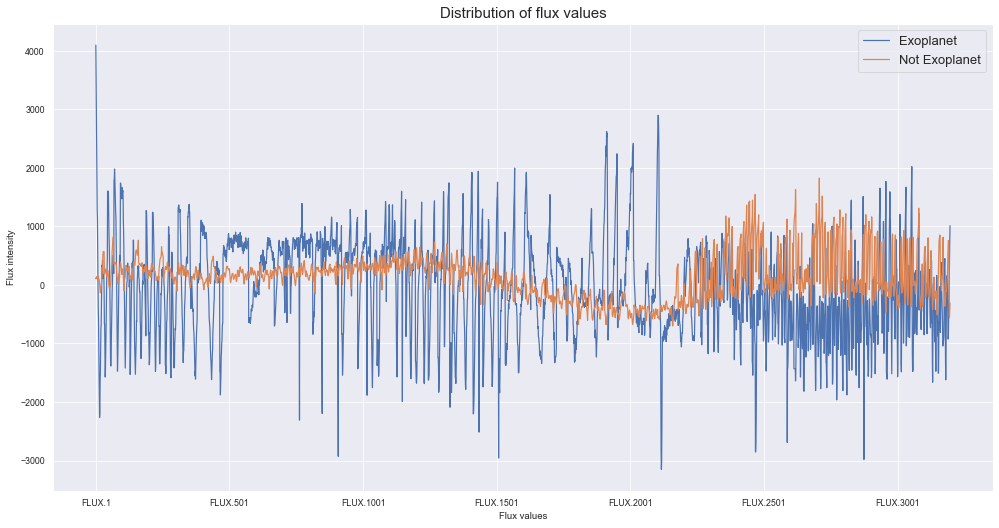

In [70]:
fig, ax = plt.subplots(figsize=(15, 8))

plot_df_1 = average.loc[average['LABEL']==1].drop('LABEL', axis=1).mean(axis=0)
plot_df_0 = average.loc[average['LABEL']==0].drop('LABEL', axis=1).mean(axis=0)

plot_df_1.T.plot(ax=ax, label='Exoplanet')
plot_df_0.T.plot(ax=ax, label='Not Exoplanet')

plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.legend(fontsize=13)

plt.show()

Here we see that along fluxes 1 to ~2001 the behaviour between the classes is quite similar. However, the fluxes above 2001 are more similarly behaved. Perhaps the fluxes 1 to ~2001 will be more relevant in the classification.

### Plotting the correlation matrix

In [71]:
# takes a while to compute
# train_corr = train_data.corr(method='spearman')

In [72]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(train_corr)
# plt.title('Correlation in the data (using Spearman)')

# plt.savefig('correlation_matrix.pdf')

# plt.show()

### plot the Gaussian histogram of non-exoplanets data.

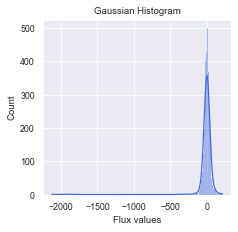

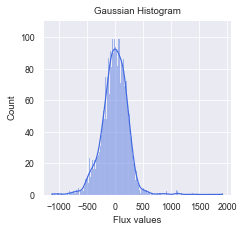

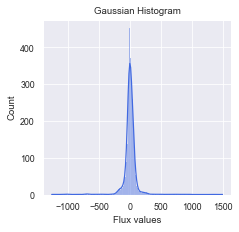

In [73]:
labels_1 = [100, 200, 300]

for i in labels_1:
    plt.figure(figsize=(3,3))
    
    sns.histplot(train_data.iloc[i,:], bins=200, color='royalblue', kde=True)

    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    
    plt.show()

### plot Gaussian histogram of the data when exoplanets are present.

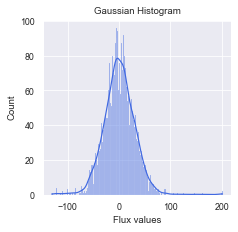

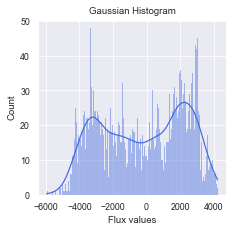

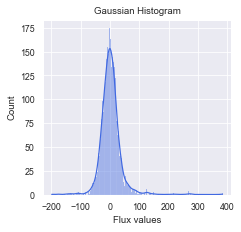

In [74]:
labels_1 = [16, 21, 25]
for i in labels_1:
    plt.figure(figsize=(3,3))
    
    sns.histplot(train_data.iloc[i,:], bins=200, color='royalblue', kde=True)

    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    
    plt.show()

### Detecting outliers using Boxplot

Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. 

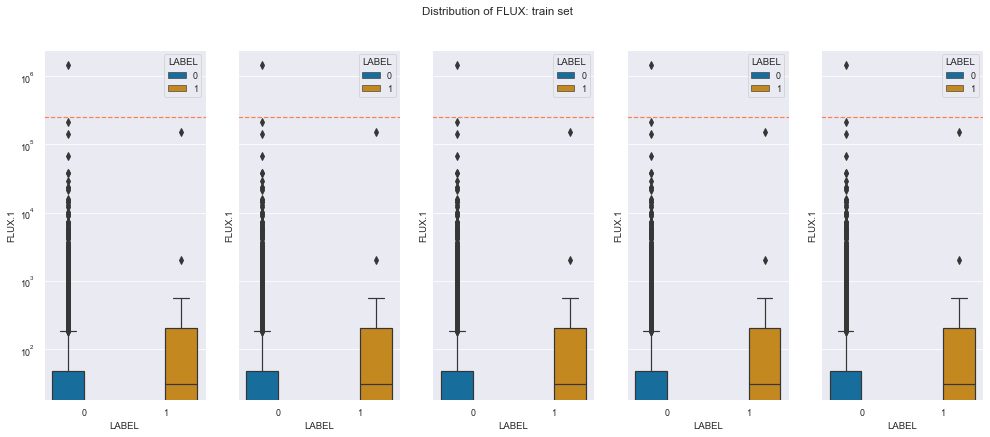

In [75]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)

fig.suptitle('Distribution of FLUX: train set')

for i in range(0, 5):
    axes[i].hlines(250000, -0.5, 1.5, linestyles='dashed', colors=['coral'])
    sns.boxplot(ax=axes[i], data=train_data, x='LABEL', y='FLUX.1', palette='colorblind', hue='LABEL')

plt.yscale('log')

plt.show()

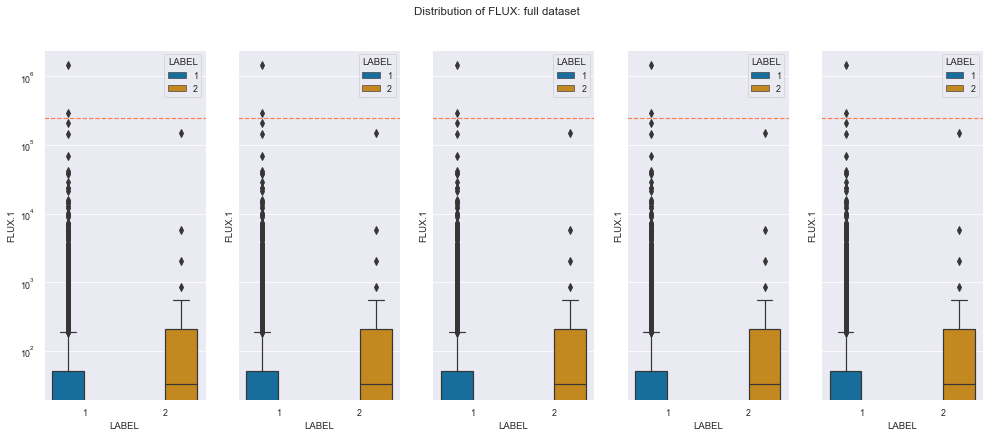

In [76]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6), sharey=True)

fig.suptitle('Distribution of FLUX: full dataset')

for i in range(0, 5):
    axes[i].hlines(250000, -0.5, 1.5, linestyles='dashed', colors=['coral'])
    sns.boxplot(ax=axes[i], data=full_data, x='LABEL', y='FLUX.1', palette='colorblind', hue='LABEL')

plt.yscale('log')

plt.show()

In [77]:
train_data['FLUX.1'].describe()

count    5.087000e+03
mean     1.445054e+02
std      2.150669e+04
min     -2.278563e+05
25%     -4.234000e+01
50%     -7.100000e-01
75%      4.825500e+01
max      1.439240e+06
Name: FLUX.1, dtype: float64

In [78]:
full_data['FLUX.1'].describe()

count    5.657000e+03
mean     1.818780e+02
std      2.078196e+04
min     -2.278563e+05
25%     -3.984000e+01
50%     -4.700000e-01
75%      5.171000e+01
max      1.439240e+06
Name: FLUX.1, dtype: float64

In [79]:
print('Dropping Outliers')
train_data.drop(train_data[train_data['FLUX.1']>250000].index, axis=0, inplace=True)
test_data.drop(test_data[test_data['FLUX.1']>250000].index, axis=0, inplace=True)
full_data.reset_index(drop=True, inplace=True)
full_data.drop(test_data[full_data['FLUX.1']>250000].index, axis=0, inplace=True)

Dropping Outliers


In [80]:
train_data['FLUX.1'].describe()

count      5086.000000
mean       -138.446972
std        7434.560053
min     -227856.260000
25%         -42.355000
50%          -0.710000
75%          48.237500
max      211468.500000
Name: FLUX.1, dtype: float64

In [81]:
full_data['FLUX.1'].describe()

count    5.657000e+03
mean     1.818780e+02
std      2.078196e+04
min     -2.278563e+05
25%     -3.984000e+01
50%     -4.700000e-01
75%      5.171000e+01
max      1.439240e+06
Name: FLUX.1, dtype: float64

In [82]:
Counter(full_data['LABEL'])

Counter({2: 42, 1: 5615})

# Machine Learning Algorithms

### Split the dataset

In [83]:
x_train = train_data.drop(["LABEL"], axis=1)
y_train = train_data["LABEL"]
x_test = test_data.drop(["LABEL"], axis=1)
y_test = test_data["LABEL"]

### Data Normalization

**Data Normalization** is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [84]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

### Apply gaussian filters

The next step is to apply gaussian filters to both test and train.


In probability theory, the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

In [85]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

### Feature scaling

we use feature scaling so that all the values remain in the comparable range.

In [86]:
# Feature scaling
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

# Model Building



## K-Neighbours

In [ ]:
knn_model = KNeighborsClassifier()  # n_neighbors=10, algorithm='kd_tree')

knn_model.fit(x_train, y_train)
prediction_knn = knn_model.predict(x_test)
print('Validation accuracy of KNN is', accuracy_score(prediction_knn, y_test))
print ("\nClassification report :\n", (classification_report(y_test, prediction_knn)))

In [ ]:
# Confusion matrix
plt.figure(figsize=(13, 10))
plt.subplot(221)

sns.heatmap(confusion_matrix(y_test, prediction_knn, normalize='true'), 
            annot=True, cmap="Blues", linecolor="k", linewidths=3)
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC curve and Area under the curve plotting
predicting_probabilites_knn = knn_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilites_knn)

plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", np.round(auc(fpr, tpr), 3)), 
         color="r", linewidth=2)
plt.plot([1, 0], [1, 0], linestyle="dashed", color="k")

plt.legend(loc="best", fontsize=13)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - Curve & Area Under the Curve",fontsize=20);

This algorithm performs quite poorly. This is most likely because it is not robust against imbalanced datasets. I think that in the higher dimensional space, the few exoplanet data points are probably not clustered closely enough and/or are too mixed with the non-exoplanet instances. Since this algorithm is distance based and fully non-parametric, it cannot further distinguish between them. I tried using other algorithms like the `kd_tree` or the `ball_tree`, and changing the number of neighbors but there was no improvement.

## Logistic Regression

In [ ]:
lr_model = LogisticRegression(class_weight={0:100, 1:1})
lr_model.fit(x_train, y_train)
prediction_lr = lr_model.predict(x_test)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction_lr, y_test))
print ("\nClassification report :\n", (classification_report(y_test, prediction_lr)))


In [ ]:
# Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, prediction_lr, normalize='true'), 
            annot=True, cmap="Blues", linecolor="k", linewidths=3)
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, predicting_probabilites)

plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :", auc(fpr, tpr)), color="r")
plt.plot([1, 0], [1, 0], linestyle="dashed", color="k")

plt.legend(loc="best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - Curve & Area Under the Curve", fontsize=20);

The ROC curve of this algorithm is slightly better. But it has slightly more confusion and it is classifying a few non-exoplanet systems as exoplanet ones. It is also not prepared for imbalanced datasets. This algorithm’s performance is also not good.

## Decision Tree

In [87]:
# Decision Tree
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)
ds_model.fit(x_train, y_train)
prediction_tree = ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction_tree, y_test))
print("\nClassification report :\n", (classification_report(y_test, prediction_tree)))

Validation accuracy of Decision Tree is 0.961335676625659

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       564
           1       0.00      0.00      0.00         5

    accuracy                           0.96       569
   macro avg       0.50      0.48      0.49       569
weighted avg       0.98      0.96      0.97       569



Text(0.5, 1.0, 'ROC - Curve & Area Under the Curve')

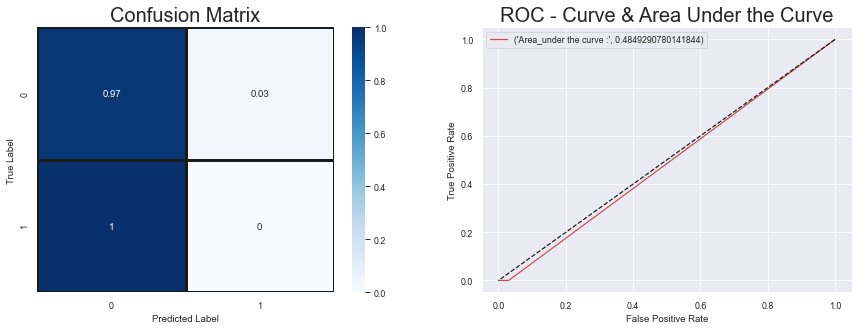

In [88]:
# Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, prediction_tree, normalize='true'), 
            annot=True, cmap="Blues", linecolor="k", linewidths=3)
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilites)

plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", auc(fpr, tpr)), color = "r")
plt.plot([1, 0], [1, 0], linestyle="dashed", color="k")

plt.legend(loc="best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - Curve & Area Under the Curve", fontsize=20)

Since the dataset is highly imbalanced even if the model predicts the same class for all data points the accuracy.

So let us first balance the classes and model it again.

### Balancing the class using SMOTE

**SMOTE** **(synthetic minority oversampling technique)** is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. **SMOTE** synthesises new minority instances between existing minority instances.

<AxesSubplot:xlabel='index'>

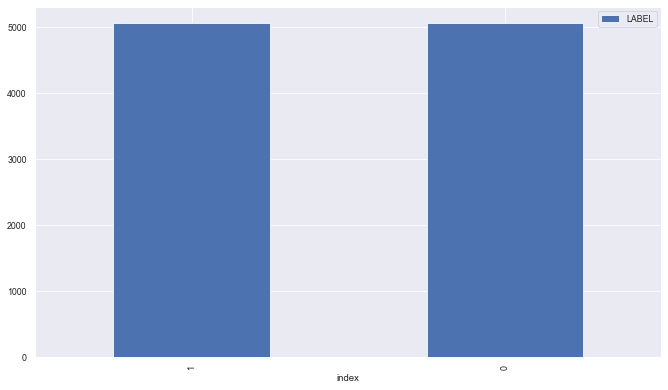

In [91]:
model = SMOTE()
smote_train_x, smote_train_y = model.fit_resample(train_data.drop('LABEL', axis=1), train_data['LABEL'])
smote_train_y = smote_train_y.astype('int')
smote_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')

In [92]:
train_X, test_X, train_y, test_y = train_test_split(smote_train_x, smote_train_y, test_size=0.33, random_state=42)

Validation accuracy of Decision Tree is 0.9447944794479448

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      1709
           1       0.91      0.98      0.95      1624

    accuracy                           0.94      3333
   macro avg       0.95      0.95      0.94      3333
weighted avg       0.95      0.94      0.94      3333



Text(0.5, 1.0, 'ROC - Curve & Are Under the Curve')

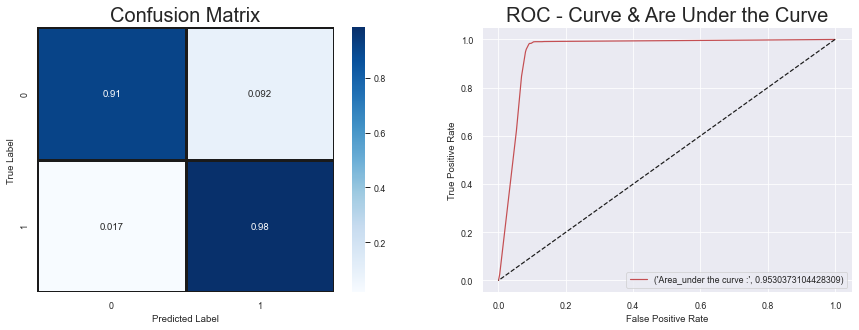

In [98]:
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(train_X, train_y)

prediction = ds_model.predict(test_X)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y, prediction, normalize='true'), 
            annot=True, cmap="Blues", linecolor="k", linewidths=3)
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - Curve & Are Under the Curve",fontsize=20)

Validation accuracy of KNN is 0.981998199819982

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1709
           1       0.96      1.00      0.98      1624

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

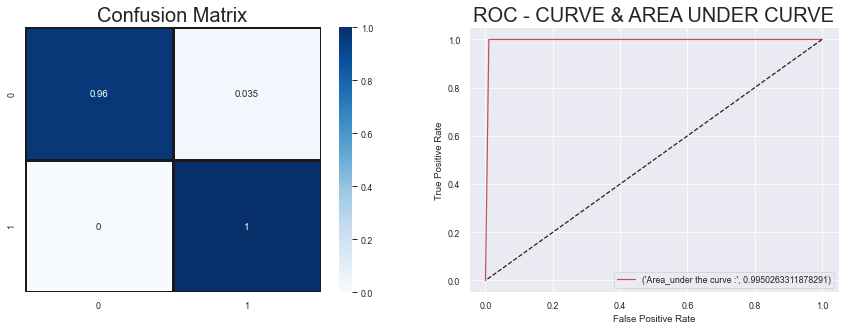

In [99]:
knn_model = KNeighborsClassifier()

knn_model.fit(train_X,train_y)

prediction = knn_model.predict(test_X)

print('Validation accuracy of KNN is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n", (classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction, normalize='true'), 
            annot=True, cmap="Blues", linecolor="k", linewidths=3)
plt.title("Confusion Matrix",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Logistic Regression is 0.6810681068106811

Classification report :
               precision    recall  f1-score   support

           0       0.70      0.66      0.68      1709
           1       0.66      0.71      0.68      1624

    accuracy                           0.68      3333
   macro avg       0.68      0.68      0.68      3333
weighted avg       0.68      0.68      0.68      3333



Text(0.5, 1.0, 'ROC - Curve & Area Under the Curve')

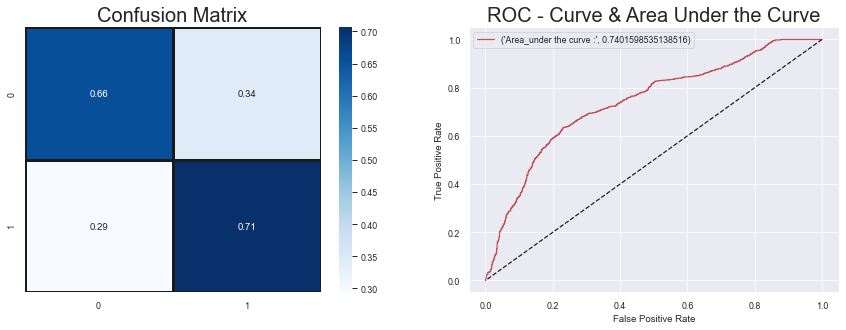

In [101]:
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(train_X,train_y)

prediction=lr_model.predict(test_X)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y, prediction, normalize='true'), 
            annot=True, cmap="Blues", linecolor="k", linewidths=3)
plt.title("Confusion Matrix", fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - Curve & Area Under the Curve",fontsize=20)

As we can observe after applying SMOTE to balance the classes, our ML models are performing really good.